# 2.0 Exploratory Data Analysis

Contents

*  [2.1 Introduction](#2.1)<a name="2.1"></a>
    
    * [2.1.1 Introduction](#2.1.1)
    * [2.1.2 Problem Recap](#2.1.2)

*  [2.2 Imports](#2.2)

*  [2.3 Load data](#2.3)

    * [2.3.1 Fashion Dataset](#2.3.1)
    * [2.3.2 Electronics Dataset](#2.3.2)
    * [2.3.3 Home/Kitchen Dataset](#2.3.3)
    
*  [2.4 Explore the data](#2.4)

## 2.1.1 Introduction <a name="2.1.1"></a>

### 2.1.1 Introduction<a name = "2.1.1"></a>

In this notebook, we will be doing EDA (exploratory data analysis) to examine the shape of our data, its features, missing values, distributions, and any other relevant information.

1. Look for any mistakes with our data collection and data wrangling.

2. Look at relationships between the different features.

3. Look at our target feature.

4. Build some initial intuition about what types of modelling may work for our problem.

### 2.1.2 Problem Recap <a name="2.1.2"></a>

Using customer text data about amazon products, we will build, evaluate and compare models to estimate the probability that a given text review can be classified as “positive”, “neutral”, or “negative”.

Our goal is to build a text classifier using Amazon product review data which can be used to analyze customer sentiment which does not have accompanying numeric data.

## 2.2 Imports <a name="2.2"></a>

In [1]:
import pyspark
from pyspark.sql import SparkSession
import pandas as pd
import pyarrow.parquet as pq
from pyspark.sql.functions import countDistinct
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
#spark = SparkSession.builder \
#    .master("local[*]") \
#    .appName("eda") \
#    .getOrCreate()

## 2.3 Load the Data <a name="2.3"></a>

### 2.3.1 Fashion Data <a name="2.3.1"></a>

In [2]:
df = pq.read_table("../data/edited/fashion0.parquet")
fashion = df.to_pandas()
fashion

,overall,verified,reviewerID,asin,reviewText,summary,unixReviewTime
0,5,True,A1D4G1SNUZWQOT,7106116521,Exactly what I needed.,perfect replacements!!,1413763200
1,2,True,A3DDWDH9PX2YX2,7106116521,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400
2,4,False,A2MWC41EW7XL15,7106116521,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800
3,2,True,A2UH2QQ275NV45,7106116521,too tiny an opening,Two Stars,1408838400
4,3,False,A89F3LQADZBS5,7106116521,Okay,Three Stars,1406419200
...,...,...,...,...,...,...,...
883631,5,True,A1ZSB2Q144UTEY,B01HJHTH5U,I absolutely love this dress!! It's sexy and ...,I absolutely love this dress,1487635200
883632,5,True,A2CCDV0J5VB6F2,B01HJHTH5U,I'm 5'6 175lbs. I'm on the tall side. I wear a...,I wear a large and ordered a large and it stil...,1480032000
883633,3,True,A3O90PACS7B61K,B01HJHTH5U,Too big in the chest area!,Three Stars,1478736000
883634,3,True,A2HO94I89U3LNH,B01HJHF97K,"Too clear in the back, needs lining",Three Stars,1478736000


## 2.4 Explore the Data <a name="2.4"></a>

In [3]:
fashion.isna().sum()

overall              0
verified             0
reviewerID           0
asin                 0
reviewText        1233
summary            533
unixReviewTime       0
dtype: int64

In [4]:
fashion["overall"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 883636 entries, 0 to 883635
Series name: overall
Non-Null Count   Dtype
--------------   -----
883636 non-null  int64
dtypes: int64(1)
memory usage: 6.7 MB


In [5]:
fashion["overall"].describe()

count    883636.00000
mean          3.90694
std           1.41828
min           1.00000
25%           3.00000
50%           5.00000
75%           5.00000
max           5.00000
Name: overall, dtype: float64

<AxesSubplot:>

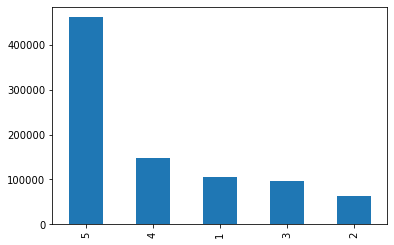

In [78]:
fashion["overall"].value_counts().plot.bar()

#axis labels
#title
#color if applicable

In [7]:
fashion.shape

(883636, 7)

In [8]:
fashion.drop_duplicates(subset=["overall", "reviewText", "asin", "reviewerID"], inplace=True)
fashion.shape

(876100, 7)

In [9]:
stars = ["One Star", "Two Stars", "Three Stars", "Four Stars", "Five Stars"]

nums = [1,2,3,4,5]

In [10]:
for s,n in zip(stars, nums):
    partial_df = fashion[fashion["summary"]==s]
    print(f"Number of '{s}' review summaries:", len(partial_df), "\n")
    
    print("Segmented by")
    print(partial_df.groupby("overall")["overall"].count())

Number of 'One Star' review summaries: 34434 

Segmented by
overall
1    34342
2       13
3       23
4       22
5       34
Name: overall, dtype: int64
Number of 'Two Stars' review summaries: 19841 

Segmented by
overall
1       52
2    19721
3       22
4       21
5       25
Name: overall, dtype: int64
Number of 'Three Stars' review summaries: 29962 

Segmented by
overall
1       21
2       22
3    29834
4       41
5       44
Name: overall, dtype: int64
Number of 'Four Stars' review summaries: 45856 

Segmented by
overall
1       18
2       24
3       28
4    45676
5      110
Name: overall, dtype: int64
Number of 'Five Stars' review summaries: 174646 

Segmented by
overall
1        43
2        13
3        39
4        54
5    174497
Name: overall, dtype: int64


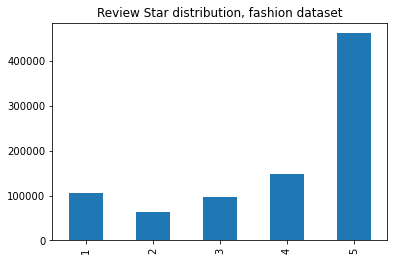

In [16]:
fashion["overall"].value_counts().sort_index().plot.bar()
plt.title("Review Star distribution, fashion dataset");

1.00 Small
0.82 Size
0.66 Fit
0.51 Look
0.50 Way
0.43 Picture
0.42 Cheap


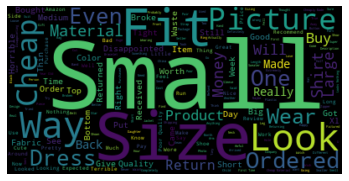

1.00 Small
0.89 Fit
0.83 Size
0.66 Look
0.50 Way
0.49 Wear
0.48 One


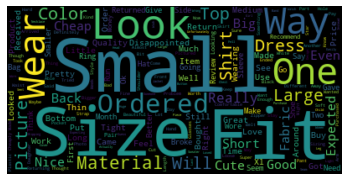

1.00 Fit
0.93 Size
0.82 Small
0.65 Look
0.52 Wear
0.48 One
0.46 Nice


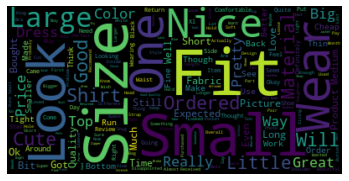

1.00 Fit
0.69 Size
0.60 Love
0.57 Great
0.54 Nice
0.53 Look
0.49 Wear


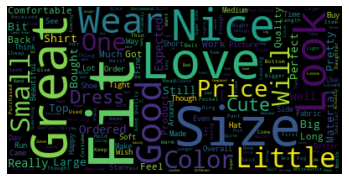

1.00 Love
0.64 Fit
0.63 Great
0.36 Size
0.34 Look
0.32 Perfect
0.32 Nice


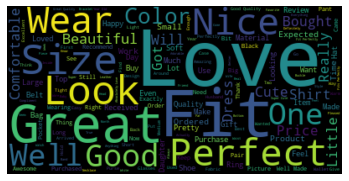

In [17]:
 for n in range(1,6):
    text = ' '.join(fashion[fashion["overall"]==n].sample(3000)["reviewText"].dropna().str.title().values)

    wc = WordCloud()
    wc.stopwords.add("i")
    wc.generate(text)

    for each_tuple in list(wc.words_.items())[0:7]:
        word, pct = each_tuple
        print("{:.2f}".format(pct), word)

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [18]:
fashion["reviewText"].isna().sum()

1223

## Star counts on reviews with missing Text

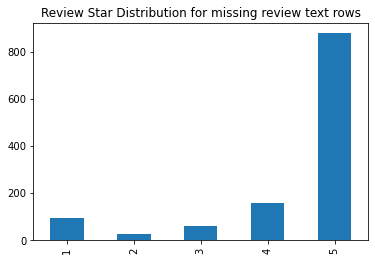

In [21]:
fashion[fashion["reviewText"].isna()]["overall"].value_counts().sort_index().plot.bar()
plt.title("Review Star Distribution for missing review text rows");

### There seems to be a slightly higher distribution of missing positive reviews than the overall data distribution would indicate. We should examine whether longer reviews more likely to be negative or positive.

## Missing data seems relatively normally distributed

In [25]:
fashion.shape

(874877, 8)

In [22]:
fashion.dropna(subset="reviewText", inplace=True)

In [23]:
fashion.shape

(874877, 7)

In [24]:
fashion["review_length"] = fashion["reviewText"].apply(lambda x: len(x.split(' ')))

## Review word counts

In [26]:
fashion["review_length"].describe()

count    874877.000000
mean         28.632507
std          38.725546
min           1.000000
25%           7.000000
50%          17.000000
75%          35.000000
max        2088.000000
Name: review_length, dtype: float64

## Examine longer reviews to see distribution of ratings

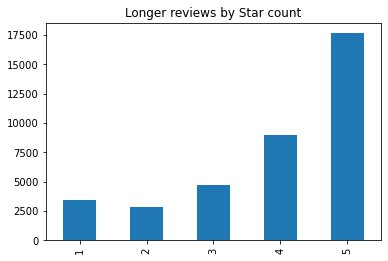

In [27]:
fashion[fashion["review_length"]>100]["overall"].value_counts().sort_index().plot.bar()
plt.title("Longer reviews by Star count");

## Examine Shorter reviews to see distribution of ratings

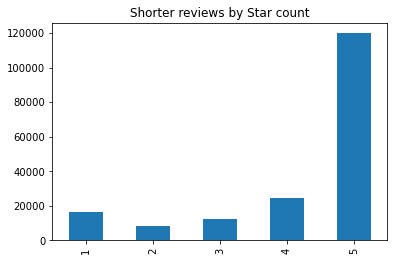

In [75]:
fashion[fashion["review_length"]<=5]["overall"].value_counts().sort_index().plot.bar()
plt.title("Shorter reviews by Star count");

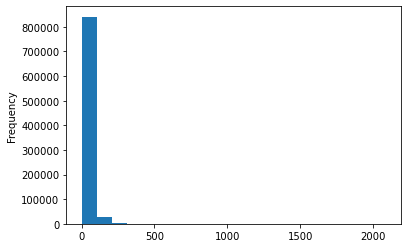

In [29]:
fashion["review_length"].plot.hist(bins=20);

### High, sparse values are skewing our bins. Our data is strongly right-skewed. Most of our reviews are at the low end of word count.

In [35]:
log_transformed_length = fashion["review_length"].apply(lambda x: np.log(x))

log_transformed_length.describe()


count    874877.000000
mean          2.714881
std           1.200243
min           0.000000
25%           1.945910
50%           2.833213
75%           3.555348
max           7.643962
Name: review_length, dtype: float64

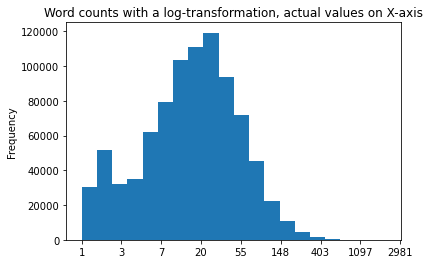

In [74]:
log_transformed_length.plot.hist(bins=20)
plt.title("Word counts with a log-transformation, actual values on X-axis")
plt.xticks(range(9), labels=[round(e**x) for x in range(9)]); #set actual word counts for x-axis labels

### 2.4.1 Summary Statistics

Univariate measures of centrality: mean, median, standard deviation, skew, IQR

Univariate visualization plots: boxplot, violin, bar, histogram

Missing data: numeric, visualization (missingno), relation to other metrics, duplicates

Bivariate: other features' relation to review length/number of stars

Faceted scatterplot/histogram
Time of day/day of week/time series analysis

encode hour of day? day of week? average rating over time? max/min dates?

hexbin stars vs review length

histogram stars, categories = binned review lengths

wordcloud for each star count

feature engineering: convert stars to positive/neutral/negative

look at summary (user/amazon generated? length of summary? is there a max? quick hist?)

### 2.4.2